In [174]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import sys
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from word_freq import sentiment_scores
import collections

In [175]:
def tokenized(df):

    #define stop words
    stop_words = list(set(stopwords.words('english')))

    #tokenize "Post" column, can create new column called "tokenized_post"
    df['Tokenized Post'] = df.apply(lambda row: nltk.word_tokenize(row['Post']), axis=1)
    # add new column called "New Label" which convert labels to number from 0-4
    df['New Label'] = df['Label'].replace(['Supportive','Ideation','Attempt','Behavior','Indicator'],[0, 1, 2, 3, 4])

    #iterrate over "tokenized_posts" cloumn
    for index, value in df["Tokenized Post"].items():
        #contain the clean tokens of a post, set list to empty every time finish iterating a post
        clean_token=[]
        #for each word in a single post
        for token in value:
            #remove any value that are not alphabetical
            new_token = re.sub(r'[^a-zA-Z]+', '', token.lower()) 
            #remove empty value and single character value, remove stop words
            if (new_token != "") and (len(new_token) >= 2) and (new_token not in stop_words): 
                vowels=len([v for v in new_token if v in "aeiou"])
                if vowels != 0: #remove line that only contains consonants
                    clean_token.append(new_token)
        #change data in "Tokenized Post" to list of tokenized words with stop words removed 
        df["Tokenized Post"][index]=" ".join(clean_token)
        
    return df

In [163]:
df = pd.read_csv('/Users/wangjiale/QWQ/Data/500_Reddit_users_posts_labels.csv')
df = tokenized(df)
df

,User,Post,Label,Tokenized Post,New Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive,viable option youll leaving wife behind youd p...,0
1,user-1,['It can be hard to appreciate the notion that...,Ideation,hard appreciate notion could meet someone else...,1
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior,hi last night sitting ledge window contemplati...,3
3,user-3,['I tried to kill my self once and failed badl...,Attempt,tried kill self failed badly cause moment want...,2
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation,hi nem sorts things enjoy personally always we...,1
...,...,...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive,end feels way least doesnt entire lifetime fix...,0
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator,skype call ended ventricular dysfunction left ...,4
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive,sounds really weirdmaybe distractibility somet...,0
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt,dont know dumb sounds feel hyperactive behavio...,2


Generate Wordcloud 

In [164]:
def get_all_words(label):
    for word in label:
        if sentiment_scores(word) != 0:
                label_n = "".join(word)
    return label_n

In [165]:
label0 = df.loc[df['New Label']==0,:]['Tokenized Post']   
label1 = df.loc[df['New Label']==1,:]['Tokenized Post']
label2 = df.loc[df['New Label']==2,:]['Tokenized Post']
label3 = df.loc[df['New Label']==3,:]['Tokenized Post']
label4 = df.loc[df['New Label']==4,:]['Tokenized Post']

label_0 = get_all_words(label0)
label_1 = get_all_words(label1)
label_2 = get_all_words(label2)
label_3 = get_all_words(label3)
label_4 = get_all_words(label4)

(-0.5, 399.5, 199.5, -0.5)

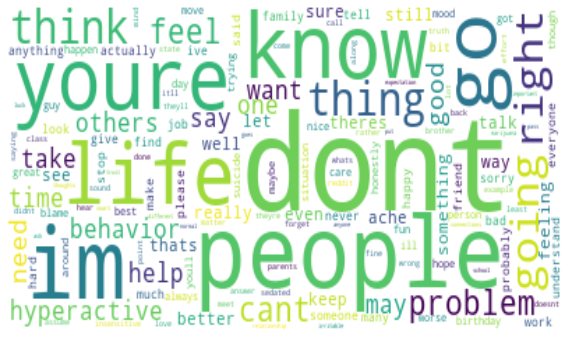

In [166]:
#Create and generate a word cloud image:
wordcloud_label_0 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_0)
wordcloud_label_1 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_1)
wordcloud_label_2 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_2)
wordcloud_label_3 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_3)
wordcloud_label_4 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_4)

# Display the generated image:
plt.imshow(wordcloud_label_0, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.savefig("/Users/wangjiale/QWQ/image/wordcloud_label_0.png", format="png")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

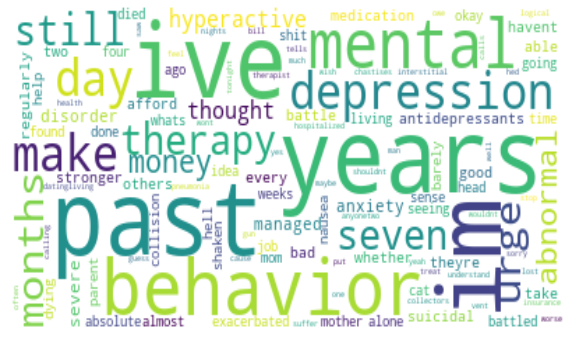

In [167]:
plt.imshow(wordcloud_label_1, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("/Users/wangjiale/QWQ/image/wordcloud_label_1.png", format="png")
plt.show()


(-0.5, 399.5, 199.5, -0.5)

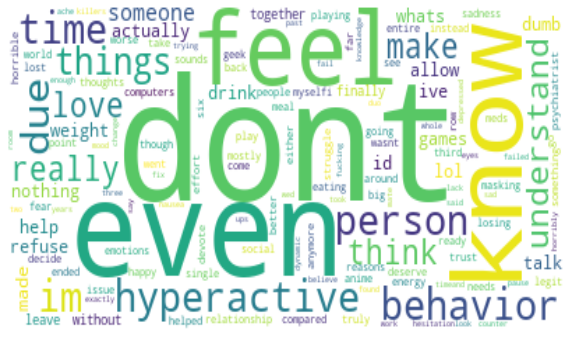

In [168]:
plt.imshow(wordcloud_label_2, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("/Users/wangjiale/QWQ/image/wordcloud_label_2.png", format="png")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

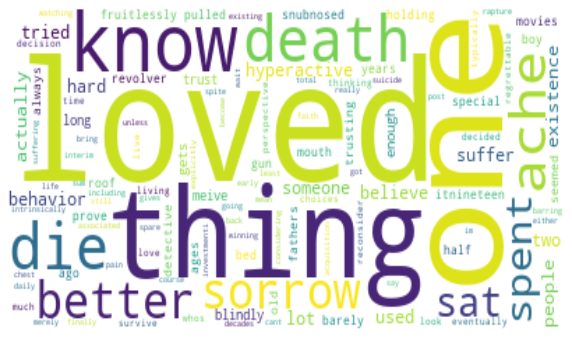

In [169]:
plt.imshow(wordcloud_label_3, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("/Users/wangjiale/QWQ/image/wordcloud_label_3.png", format="png")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

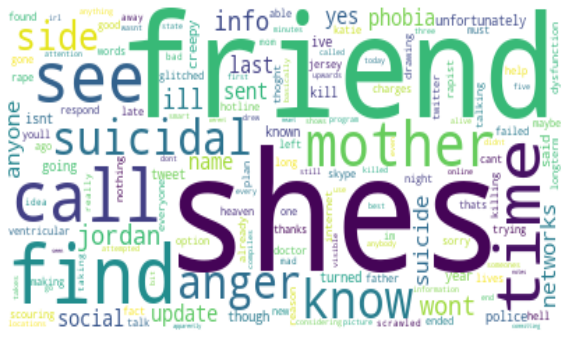

In [170]:
plt.imshow(wordcloud_label_4, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("/Users/wangjiale/QWQ/image/wordcloud_label_4.png", format="png")
plt.show()

Generate Freqency Graph 

In [171]:
def freq_df(label_list, label_num):
    ll = label_list.split()
    counts_ll = collections.Counter(ll)
    counts_ll.most_common(15)
    ll_df = pd.DataFrame(counts_ll.most_common(15), columns=['words', 'count'])
    ll_df["label"] = label_num
    return ll_df

In [172]:
d0 = freq_df(label_0, "0")
d1 = freq_df(label_1, "1")
d2 = freq_df(label_2, "2")
d3 = freq_df(label_3, "3")
d4 = freq_df(label_4, "4")

result = d0.append([d1, d2, d3, d4], ignore_index=True)
result

,words,count,label
0,dont,58,0
1,people,42,0
2,im,41,0
3,know,31,0
4,youre,30,0
...,...,...,...
70,anger,3,4
71,side,2,4
72,jordan,2,4
73,ill,2,4


**********Some Problems with Overlaied Histogram Below*************

In [173]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=d1['words'], y=d1['count']))
fig.add_trace(go.Histogram(x=d0['words'], y=d0['count']))
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
